# Peeking at the Cornershop Database
Our objective is to estimate the time it takes for a delivery to
complete, let's check which Databases we have available.

This is just a peek to have a grasp of the type of data we're dealing with :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import time
import datetime

## Checking: ``orderproducts.csv``
This table gives specific information of what the order contains:
How many units/weight is requested in the order.

In [2]:
# let's take a small peek at the table
order_products = pd.read_csv('./data/order_products.csv')
order_products

,order_id,product_id,quantity,buy_unit
0,47099653730fb1b76537fc10ad876255,c1244453d731c77416cb4766e3bd76cb,1.0,UN
1,689d8866915acf87e851c2591a23a82f,43cc2b100bec640fe563cd16f2db669f,1.0,KG
2,f26d16bf6f38c9e31d0be877f4013a9e,b8f880759d014134e272d881d49989a2,1.0,UN
3,161ccc896835ab41761b0e726becb6b1,dbc062b9bef805d27a6f4bea7edfe1f1,1.0,UN
4,4713deca10bb5db98fae150b52d61fc0,93a060f269bb569398921100f84c519a,2.0,UN
...,...,...,...,...
198495,edd8fe4fd7d75de060cae811756603b0,e7f4a5ea6d480b7a1a7076fad543875e,3.0,UN
198496,70c0ff9c8533539b1c04e96398fef697,f506d0401b99c6c00d8792d38ce93aa1,6.0,UN
198497,dcf086aadb08ef7e695fadd723d881a7,c9970c5966ad6399d1c52aef34268699,1.0,UN
198498,f5f76f8fb58cdafe94b41fd836dfcec7,2cdd75fa252b3918918c662922b11b6e,3.0,UN


f90b55ea82b8af664f1d7eebb93f25e0    2073
bdcc4590896a0d0b419d0388fd16a859    1598
41da609c519d77b29be442f8c1105647    1562
280cf18baf4311c92aa5a042336587d3    1336
fb3336fca8851437f980e83045e75749    1092
                                    ... 
a0281c66f744ef7dee6e036a20f244ef       1
3b776c182b707101c69dfb16fe199c56       1
2448b9927491425c1d344816c384d5de       1
41840717626632c519827cbbf473d45e       1
932dfae0a06952166e3e0f624447d4c3       1
Name: product_id, Length: 15422, dtype: int64


<AxesSubplot:ylabel='Frequency'>

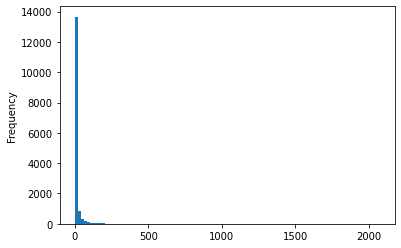

In [15]:
# take a peek of how many product_ids we have
counts = order_products['product_id'].value_counts()
print(counts)
counts.plot.hist(bins=100)

We observe that some products are really popular and hold all the
frequency of buy, if we want to synthesize product bag then we have
to reflect the weight of popularity in some way, maybe popular products
are easier to find and buy (example: toilet paper or milk).

In [13]:
# check how many products a person orders in average
# let's group by order to see a better picture of our table
order_grouped = order_products\
    .groupby(['order_id'])\
    .agg(['count'])
order_grouped['product_id']

,count
order_id,
0004a3841c1eeb6c6e77585a941c21e0,4
0005a6ecbbde1e8d273f5577bcff2c9c,1
0007baeb6700fc203be2d1f1e11222d7,22
0012195a6a8ca9ec308a3010eeea8ebc,11
0013011fa72b498b9feb84f4e7104980,44
...,...
ffc3234b2e009e5422a4b5e24961c038,15
ffcc66cd4d1056b67523a39ff07d7700,40
ffcf270be4bba33349ce827c70fe9439,22


count    19.893766
dtype: float64


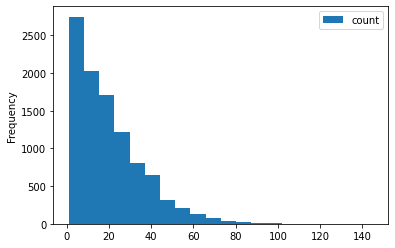

In [16]:
# Make a simple plot of the distribution
order_grouped['product_id'].plot.hist('count', bins=20)
print(order_grouped['product_id'].mean())
plt.show()

## Checking: ``orders.csv``
This is the main table, orders without ``total_minutes`` have to be predicted.
Before we check the table, let's transform time strings to unix time as it's
easier to plot and model.

In [18]:
# create a function to map time to unix
def add_unix_time(df, col, new_col):
    container = []
    for value in df[col]:
        t_formatted = datetime.datetime.strptime(value, "%Y-%m-%d %H:%M:%S%z").timetuple()
        container.append(time.mktime(t_formatted))
    df[new_col] = container

In [21]:
# load the orders table
orders = pd.read_csv('./data/orders.csv')
add_unix_time(orders, 'promised_time', 'unix_time')
orders

,order_id,lat,lng,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,unix_time
0,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,1.571442e+09
1,6581174846221cb6c467348e87f57641,-33.440584,-70.556283,2019-10-19 01:00:00+00:00,False,195f9e9d84a4ba9033c4b6a756334d8b,45fbc6d3e05ebd93369ce542e8f2322d,57.060632,1.571458e+09
2,3a226ea48debc0a7ae9950d5540f2f34,-32.987022,-71.544842,2019-10-19 14:54:00+00:00,True,a5b9ddc0d82e61582fca19ad43dbaacb,07563a3fe3bbe7e3ba84431ad9d055af,NaN,1.571508e+09
3,7d2ed03fe4966083e74b12694b1669d8,-33.328075,-70.512659,2019-10-18 21:47:00+00:00,True,d0b3f6bf7e249e5ebb8d3129341773a2,f1748d6b0fd9d439f71450117eba2725,52.067742,1.571446e+09
4,b4b2682d77118155fe4716300ccf7f39,-33.403239,-70.564020,2019-10-19 20:00:00+00:00,False,5c5199ce02f7b77caa9c2590a39ad27d,1f0e3dad99908345f7439f8ffabdffc4,140.724822,1.571526e+09
...,...,...,...,...,...,...,...,...,...
9995,c63cfa783ff6ea9a5577ff0b513e4297,-33.417677,-70.508377,2019-10-19 01:00:00+00:00,False,9cf7b3c6a05745b24eb07e0945ff1718,c4ca4238a0b923820dcc509a6f75849b,116.631287,1.571458e+09
9996,0b91a6dc570736f490ade9b129bbd46f,-33.432885,-70.646795,2019-10-19 19:00:00+00:00,False,6fd0c09e971aff77c73afb87863da1c6,3871bd64012152bfb53fdf04b401193f,94.094497,1.571522e+09
9997,229d80f473668d9b25d60ea4d05687dd,-33.424562,-70.582943,2019-10-19 01:00:00+00:00,False,3ed51e3e0e8c9ca2fec3f84766cabe96,1f0e3dad99908345f7439f8ffabdffc4,53.784000,1.571458e+09
9998,96e2a7a69e52eaa5ce563b1164f72c8d,-33.413806,-70.598500,2019-10-19 18:00:00+00:00,False,cea50f5aa525cfe6d2f445fec7c8ef31,1f0e3dad99908345f7439f8ffabdffc4,52.806311,1.571519e+09


A quick look at this table arises two interesting questions, how wide is our spectrum of lat/lng
geographical data? Maybe it's scope is small it means we're really optimizing for just a city so let's
investigate this because if we know the city we may find easy to optimize x/y coords just as
distance between store and user.

## Checking: ``shopper.csv``
In this table we have more information on whom the shopper is...

In [22]:
shoppers = pd.read_csv('./data/shoppers.csv')
shoppers

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,1fc20b0bdf697ac13dd6a15cbd2fe60a,41dc7c9e385c4d2b6c1f7836973951bf,0.8606,1.94,1.00,4.87
1,e1c679ac73a69c01981fdd3c5ab8beda,6c90661e6d2c7579f5ce337c3391dbb9,0.8446,1.23,0.92,4.92
2,09d369c66ca86ebeffacb133410c5ee1,6c90661e6d2c7579f5ce337c3391dbb9,0.8559,1.56,1.00,4.88
3,db39866e62b95bb04ebb1e470f2d1347,50e13ee63f086c2fe84229348bc91b5b,NaN,2.41,NaN,NaN
4,8efbc238660053b19f00ca431144fdae,6c90661e6d2c7579f5ce337c3391dbb9,0.8770,1.31,0.92,4.88
...,...,...,...,...,...,...
2859,da24da1311f7913f6d2d29d8238b439c,6c90661e6d2c7579f5ce337c3391dbb9,0.8951,1.53,0.88,4.80
2860,cf95eda5ffc1d4b9586de2ca08ab40f8,50e13ee63f086c2fe84229348bc91b5b,0.8695,3.00,0.56,5.00
2861,e8482e3ad8bc820ec756566a472b84b1,6c90661e6d2c7579f5ce337c3391dbb9,0.9152,1.47,0.88,4.96
2862,a55a3765a02530a97eb9af7aee327486,6c90661e6d2c7579f5ce337c3391dbb9,0.8695,1.20,0.96,4.80


We notice right away that ``seniority`` has been tokenized, and this field may be important
to fill other values such as ``found_rate`` or ``accepted_rate``, this is because we can fill
with the average of said seniority group.

Something important about ``seniority`` field is that there may be a certain proximity between tokens
that has been washed away during tokenization, let's say for example that token 6c9 is not senior and
50e is next seniority level, but the table as it's given there's not really a way to know if they're
next to each other, so maybe before using this field we can try to calculate proximity!

Before this, let's check how many levels we have on this field...

In [23]:
# check how many different seniority levels we're dealing with
shoppers['seniority'].value_counts()

6c90661e6d2c7579f5ce337c3391dbb9    1643
50e13ee63f086c2fe84229348bc91b5b     719
41dc7c9e385c4d2b6c1f7836973951bf     440
bb29b8d0d196b5db5a5350e5e3ae2b1f      62
Name: seniority, dtype: int64

So we have four levels of seniority that's good! Before we tokenize them we'll make sure to know
which one is next to the other, a way of doing this could be by:
* Calculating the average cosine similarity of vectors.
* Calculating the distance between clusters of vectors.
* Reducing the dimensionality with PCA analysis and checking in a 2D plane.

Also, it arises the question of how empty fields we have overall in data, so at the end let's create
a pandas profile of each table.

## Checking: ``storebranch.csv``
Very straight-forward, we have the location of store and store branch
(example: we may have a "Santa Isabel").

In [24]:
stores = pd.read_csv('./data/storebranch.csv')
stores

,store_branch_id,store_id,lat,lng
0,aff1621254f7c1be92f64550478c56e6,92cc227532d17e56e07902b254dfad10,-33.422497,-70.609231
1,56352739f59643540a3a6e16985f62c7,0336dcbab05b9d5ad24f4333c7658a0e,-33.385484,-70.555579
2,7d04bbbe5494ae9d2f5a76aa1c00fa2f,9bf31c7ff062936a96d3c8bd1f8f2ff3,-33.416579,-70.565224
3,2b24d495052a8ce66358eb576b8912c8,c4ca4238a0b923820dcc509a6f75849b,-33.512578,-70.655952
4,5487315b1286f907165907aa8fc96619,d82c8d1619ad8176d665453cfb2e55f0,-33.347645,-70.542229
...,...,...,...,...
471,045117b0e0a11a242b9765e79cbf113f,a87ff679a2f3e71d9181a67b7542122c,-33.036111,-71.524149
472,2cfa3753d6a524711acb5fce38eeca1a,3f67fd97162d20e6fe27748b5b372509,-33.406081,-70.598128
473,7486cef2522ee03547cfb970a404a874,8f468c873a32bb0619eaeb2050ba45d1,-33.397498,-70.584666
474,c06d06da9666a219db15cf575aff2824,9a1158154dfa42caddbd0694a4e9bdc8,-33.390604,-70.547206


What happens if we have a local store with no store branch?
We would guess that it has a special token for this case, let's count the token occurrences.

In [25]:
# count store_branch_id occurrences
store_counts = stores['store_id'].value_counts()
store_counts

c4ca4238a0b923820dcc509a6f75849b    33
9bf31c7ff062936a96d3c8bd1f8f2ff3    23
c0c7c76d30bd3dcaefc96f40275bdc0a    19
a87ff679a2f3e71d9181a67b7542122c    17
f899139df5e1059396431415e770c6dd    15
                                    ..
8d34201a5b85900908db6cae92723617     1
df0aab058ce179e4f7ab135ed4e641a9     1
30bb3825e8f631cc6075c0f87bb4978c     1
48aedb8880cab8c45637abc7493ecddd     1
8f468c873a32bb0619eaeb2050ba45d1     1
Name: store_id, Length: 221, dtype: int64

Because we have a lot of one-store tokens, let's check them just to know if they could
be represented as a special store type.

In [26]:
store_counts[store_counts==1]

69adc1e107f7f7d035d7baf04342e1ca    1
16c222aa19898e5058938167c8ab6c57    1
8cb22bdd0b7ba1ab13d742e22eed8da2    1
e0cf1f47118daebc5b16269099ad7347    1
a4a042cf4fd6bfb47701cbc8a1653ada    1
                                   ..
8d34201a5b85900908db6cae92723617    1
df0aab058ce179e4f7ab135ed4e641a9    1
30bb3825e8f631cc6075c0f87bb4978c    1
48aedb8880cab8c45637abc7493ecddd    1
8f468c873a32bb0619eaeb2050ba45d1    1
Name: store_id, Length: 153, dtype: int64

So from 221 stores, 153 of them are independent, and they don't seem to be grouped in some
class in particular.

## Conclusions
We can use ``orders.csv`` as the central table, then join data from the others by looking
up information by respective ids. It should look something like this:

<img alt="image" height="600" src="imgs/cornershop_db.PNG" width="800"/>

We need to take care of these assignments for each table:

* There are n-products for each order, so we will synthesize them in a fixed length of values.
* We'll add distance between user and shop as redundant data made from lat/lng values.
* We must tokenize seniority in a smart way, as right adjacency may favor any model.
* Time values are easier to process as unix format numerical values.

Finally, let's create a pandas profile for each table just to observe how skewed
is our data, how much data is missing, etc. In the next notebooks, we'll
convert each table to our advantage, so it can be joined in the final
dataset we'll use at training.

In [27]:
# create a pandas profile for each table
def profile(df, name, minimal=True):
    prof = ProfileReport(df, minimal=minimal)
    prof.to_file(name)

In [28]:
profile(order_products, './profiles/order_products.html')
profile(orders, './profiles/orders.html')
profile(shoppers, './profiles/shoppers.html')
profile(stores, './profiles/stores.html')

Summarize dataset:   0%|          | 0/12 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/14 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/12 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]